In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("fake_transactional_data_24.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [4]:
df.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [5]:
print(df.isnull().sum())

from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64


In [6]:
len(pd.unique(df['from_totally_fake_account']))

8142

In [7]:
len(pd.unique(df['to_randomly_generated_account']))

14300

Visualize the transactions for each month and then notice a significant increase in December

In [26]:
# Harmonization of date formats
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], dayfirst=True)
# Set date columns as indexes
df.set_index('not_happened_yet_date', inplace=True)

In [27]:
# Print all years
df['year'] = df.index.year
unique_years = df['year'].unique()
print("Years in data：", unique_years)

Years in data： [2025]


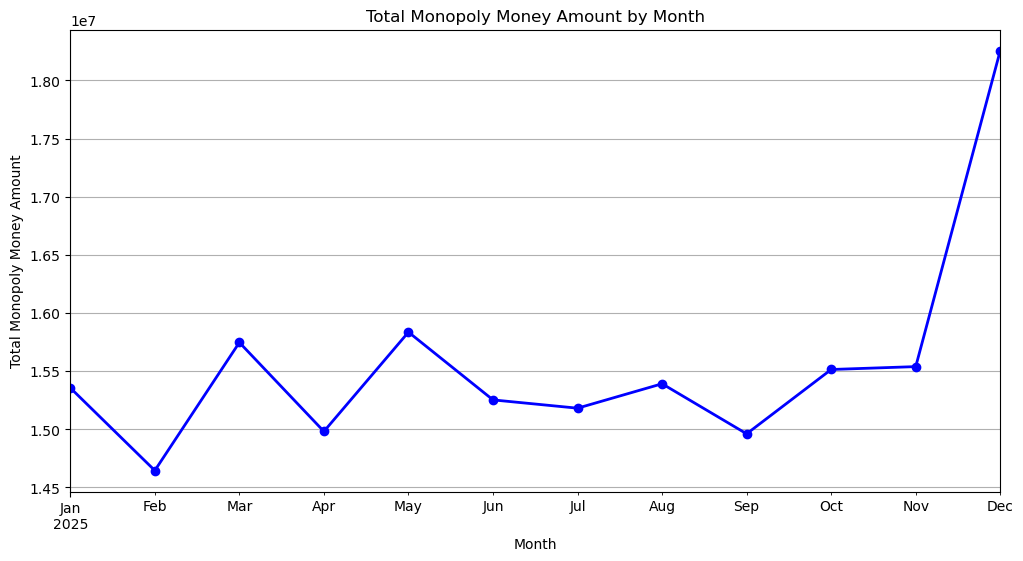

In [28]:
# Visualization of total transactions per month
monthly_sum = df['monopoly_money_amount'].resample('ME').sum()

plt.figure(figsize=(12, 6))
monthly_sum.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Total Monopoly Money Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Monopoly Money Amount')
plt.grid(True)
plt.show()

In [29]:
# View December's transaction data
peak_month_transactions = df.loc['2025-12']

len(peak_month_transactions)

911468

C:\Users\86181\AppData\Local\Temp\ipykernel_5904\4169897209.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({'monopoly_money_amount': ['sum', 'count']})


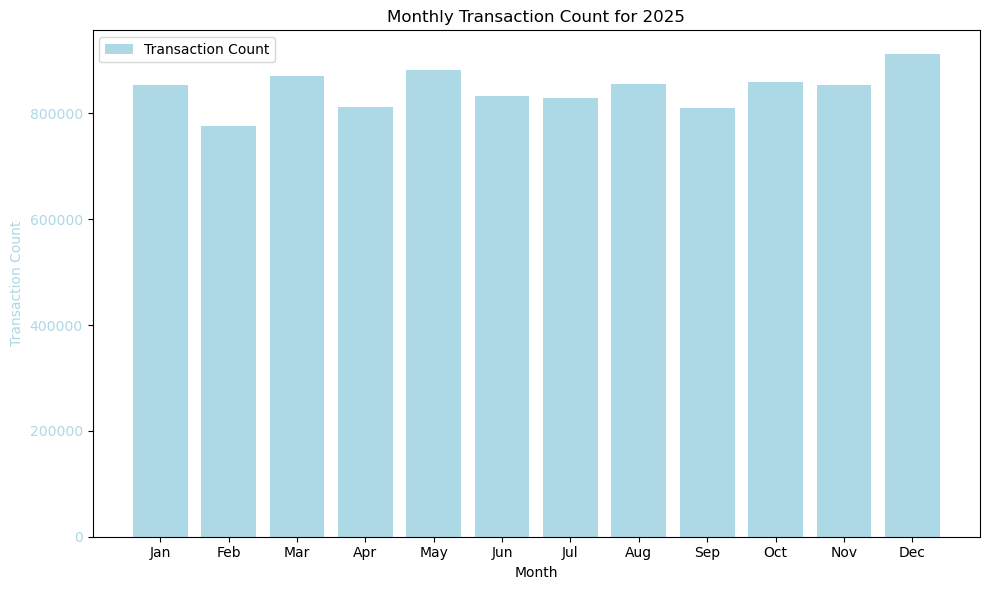

In [30]:
# Resampled on a monthly basis to calculate the total amount and number of transactions per month
monthly_data = df.resample('M').agg({'monopoly_money_amount': ['sum', 'count']})
monthly_data.columns = ['Total Amount', 'Transaction Count']

# Plotting bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(monthly_data.index.month, monthly_data['Transaction Count'], color='lightblue', label='Transaction Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Transaction Count', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# Setting up chart titles and axis labels
plt.title('Monthly Transaction Count for 2025')
ax1.set_xlabel('Month')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show legend
fig.tight_layout()
ax1.legend(loc='upper left')

# Show chart
plt.show()

There is a cyclical change in the volume of transactions each month. Customers will make large transactions on three days, Friday, Saturday and Sunday.

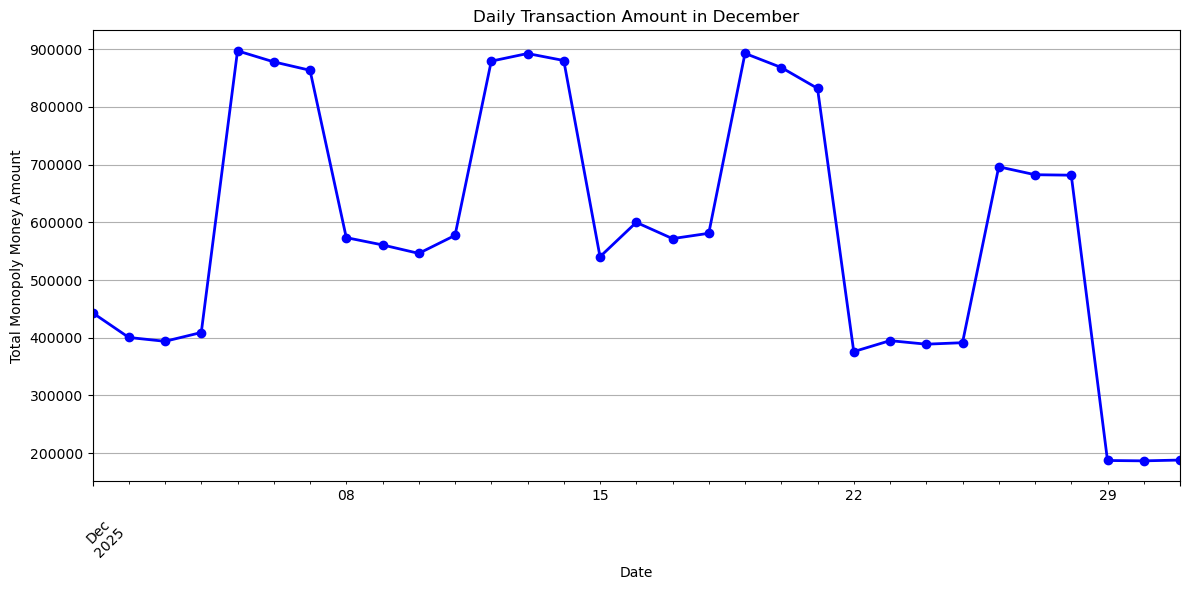

In [34]:
# Filter out December data
december_data = df[df.index.month == 12]

# Resample on a daily basis and calculate the total number of transactions per day
daily_december_sum = december_data['monopoly_money_amount'].resample('D').sum()

# Create line chart
plt.figure(figsize=(12, 6))
daily_december_sum.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Daily Transaction Amount in December')
plt.xlabel('Date')
plt.ylabel('Total Monopoly Money Amount')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.grid(True)
plt.show()

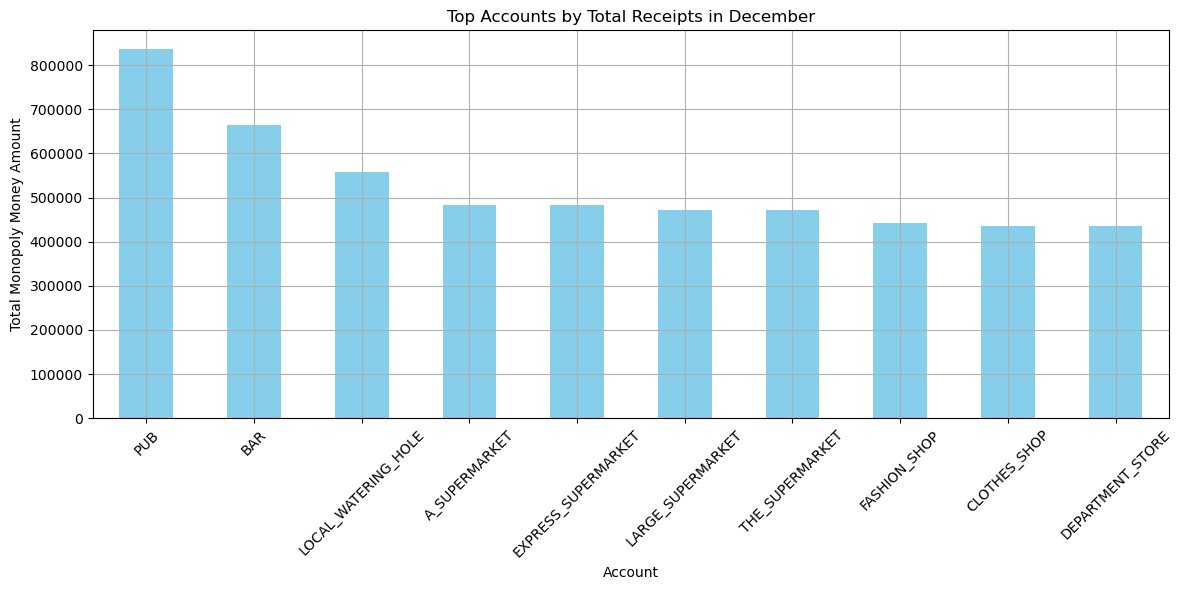

In [35]:
# Grouped by collection account and calculated the total amount collected for each account
account_totals = december_data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().sort_values(ascending=False)

# Select the top 10 accounts with the highest receipts
top_accounts = account_totals.head(10)

# Create chart
plt.figure(figsize=(12, 6))
top_accounts.plot(kind='bar', color='skyblue')
plt.title('Top Accounts by Total Receipts in December')
plt.xlabel('Account')
plt.ylabel('Total Monopoly Money Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\86181\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


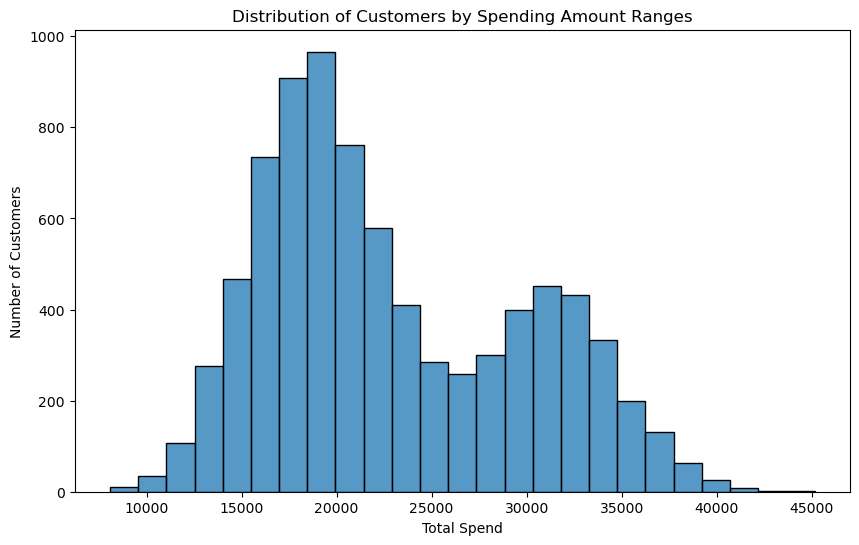

In [15]:
# Visualizaiton on distribution of Customers by Spending Amount Ranges
total_spend_per_customer = df.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()

plt.figure(figsize=(10, 6))
sns.histplot(total_spend_per_customer, bins=25)
plt.title('Distribution of Customers by Spending Amount Ranges')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\86181\AppData\Local\Temp\ipykernel_5904\2629960981.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_transaction_freq = customer_spend.groupby('spend_category')['transaction_count'].mean()
C:\Users\86181\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


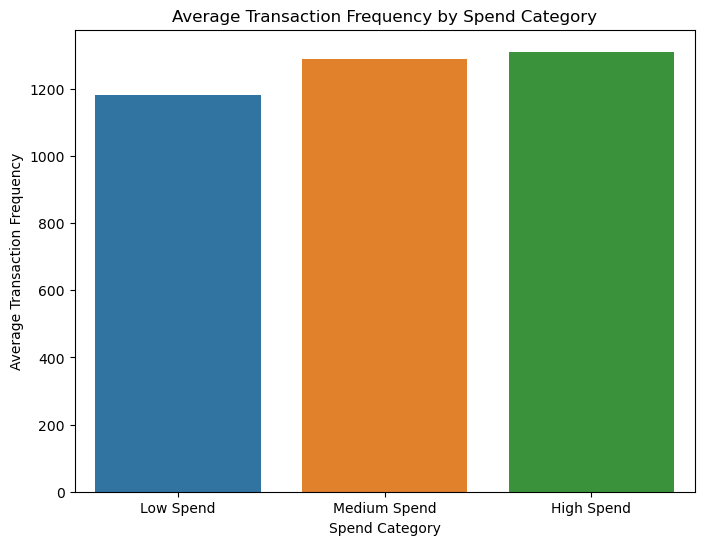

In [16]:
# Calculate the total amount spent per customer
total_spend_per_customer = df.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().reset_index()

total_spend_per_customer.rename(columns={'monopoly_money_amount': 'total_spend'}, inplace=True)

# Calculate the number of transactions per customer
transaction_count_per_customer = df.groupby('from_totally_fake_account').size().reset_index(name='transaction_count')

# Merge total consumption and number of transactions into a new DataFrame
customer_spend = pd.merge(total_spend_per_customer, transaction_count_per_customer, on='from_totally_fake_account')

# Set cutoffs for spending amounts and create spending hierarchy labels
low_spend_threshold = 20000
high_spend_threshold = 30000
customer_spend['spend_category'] = pd.cut(customer_spend['total_spend'], 
                                          bins=[0, low_spend_threshold, high_spend_threshold, customer_spend['total_spend'].max()], 
                                          labels=['Low Spend', 'Medium Spend', 'High Spend'], 
                                          include_lowest=True)

# Calculate the average frequency of transactions for each group
average_transaction_freq = customer_spend.groupby('spend_category')['transaction_count'].mean()

# Visualize the average frequency of transactions per group
plt.figure(figsize=(8, 6))
sns.barplot(x=average_transaction_freq.index, y=average_transaction_freq.values)
plt.title('Average Transaction Frequency by Spend Category')
plt.xlabel('Spend Category')
plt.ylabel('Average Transaction Frequency')
plt.show()

C:\Users\86181\AppData\Local\Temp\ipykernel_5904\3599867819.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spend_per_category = customer_spend.groupby('spend_category')['total_spend'].mean()
C:\Users\86181\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


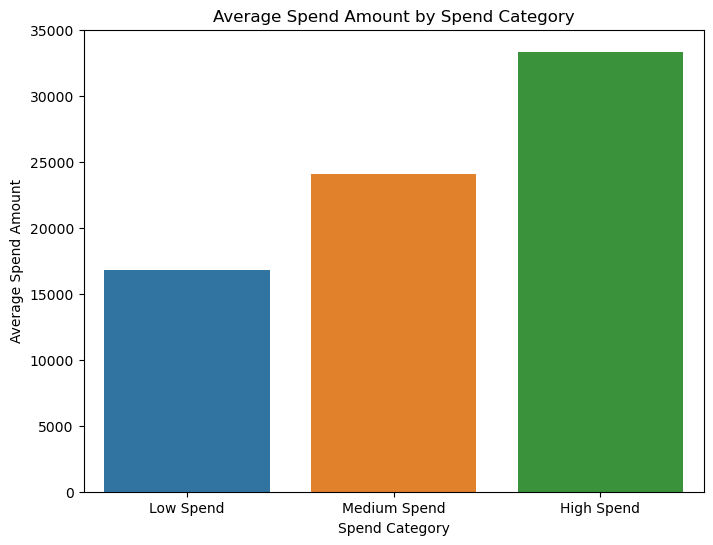

In [17]:
# Calculate the average amount spent by each group
average_spend_per_category = customer_spend.groupby('spend_category')['total_spend'].mean()

# Visualize the average amount spent per group
plt.figure(figsize=(8, 6))
sns.barplot(x=average_spend_per_category.index, y=average_spend_per_category.values)
plt.title('Average Spend Amount by Spend Category')
plt.xlabel('Spend Category')
plt.ylabel('Average Spend Amount')
plt.show()

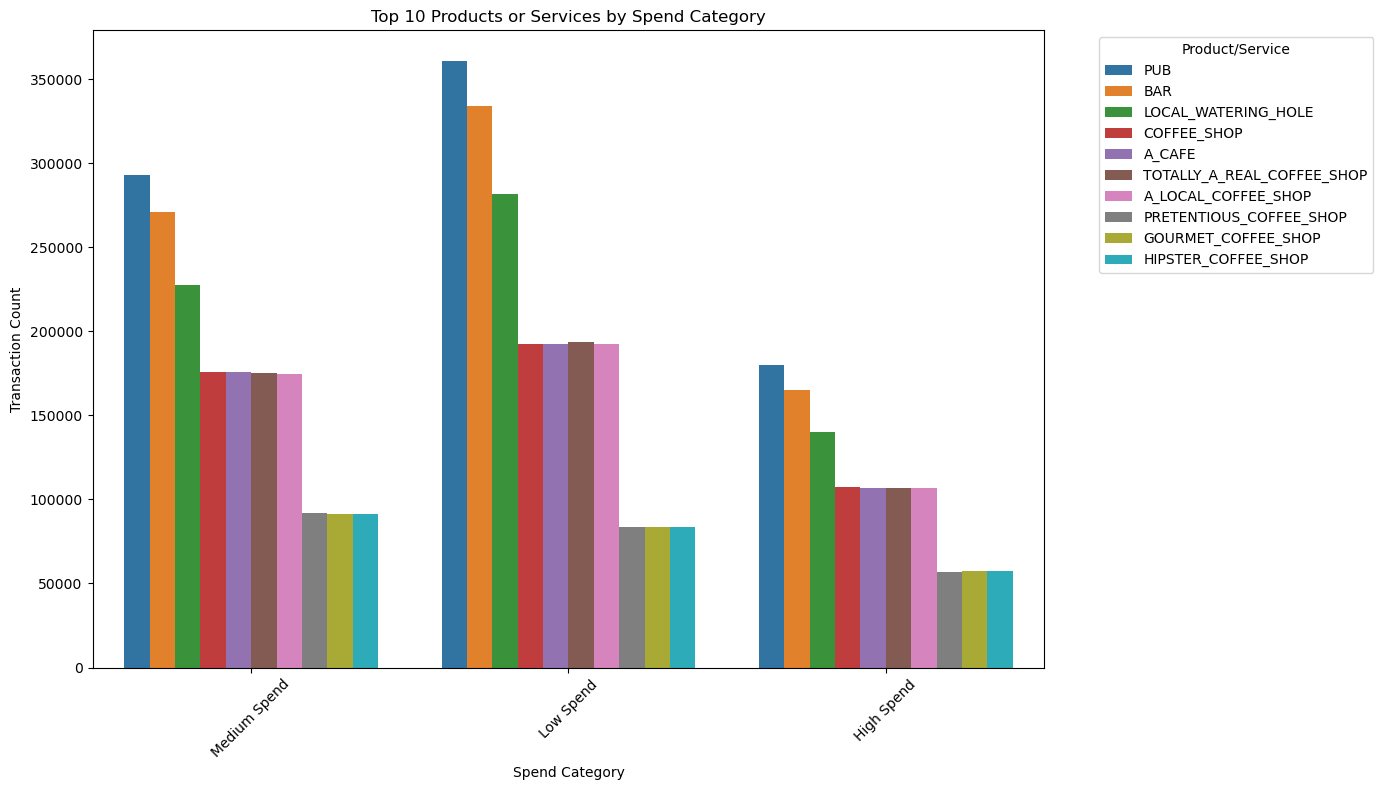

In [18]:
# Merge consumption level information into the original dataset
df = df.merge(customer_spend[['from_totally_fake_account', 'spend_category']], on='from_totally_fake_account', how='left')

# Initialize an empty list to store the DataFrame for each cluster
top_products_per_category = []

# Each level of consumption is treated separately
for category in df['spend_category'].unique():
    # Count and sort the products in the current cluster
    top_products = df[df['spend_category'] == category].groupby('to_randomly_generated_account').size().reset_index(name='count').sort_values('count', ascending=False).head(10)
    # Add group information
    top_products['spend_category'] = category
    # Add results to the list
    top_products_per_category.append(top_products)

# Consolidated results
top_products_df = pd.concat(top_products_per_category)

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(x='spend_category', y='count', hue='to_randomly_generated_account', data=top_products_df)
plt.title('Top 10 Products or Services by Spend Category')
plt.xlabel('Spend Category')
plt.ylabel('Transaction Count')
plt.legend(title='Product/Service', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Calculate the consumption IQR for each merchant
def calculate_iqr(group):
    q1 = group['monopoly_money_amount'].quantile(0.25)
    q3 = group['monopoly_money_amount'].quantile(0.75)
    iqr = q3 - q1
    return pd.Series([q1, q3, iqr, q1 - 1.5 * iqr, q3 + 1.5 * iqr], index=['Q1', 'Q3', 'IQR', 'Lower_Bound', 'Upper_Bound'])

business_iqr = df.groupby('to_randomly_generated_account').apply(calculate_iqr).reset_index()

# Find out each customer's first purchase at each merchant
first_purchase_per_customer_per_business = df.sort_index().drop_duplicates(subset=['from_totally_fake_account', 'to_randomly_generated_account'], keep='first').reset_index()

# Merge IQR information into the first purchase record
first_purchase_per_customer_per_business = first_purchase_per_customer_per_business.merge(business_iqr, on='to_randomly_generated_account')

# Mark customers whose first purchase is well above the upper bound of the IQR
first_purchase_per_customer_per_business['is_outlier'] = first_purchase_per_customer_per_business.apply(lambda x: x['monopoly_money_amount'] > x['Upper_Bound'], axis=1)

# Filtering of unusual consumption records
outliers = first_purchase_per_customer_per_business[first_purchase_per_customer_per_business['is_outlier']]

# Show results
print(outliers[['from_totally_fake_account', 'to_randomly_generated_account', 'monopoly_money_amount', 'Q1', 'Q3', 'IQR', 'Lower_Bound', 'Upper_Bound']])

C:\Users\86181\AppData\Local\Temp\ipykernel_5904\1365786625.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  business_iqr = df.groupby('to_randomly_generated_account').apply(calculate_iqr).reset_index()


        from_totally_fake_account to_randomly_generated_account  \
3                         18555.0           HIPSTER_COFFEE_SHOP   
5                         18555.0    TOTALLY_A_REAL_COFFEE_SHOP   
25                        88339.0                   COFFEE_SHOP   
31                        82454.0    TOTALLY_A_REAL_COFFEE_SHOP   
113                       39111.0           HIPSTER_COFFEE_SHOP   
...                           ...                           ...   
490514                    87545.0                   WINE_CELLAR   
490721                    33714.0                  LIQUOR_STORE   
490724                    55475.0                      PET_SHOP   
490727                    97602.0                      PET_SHOP   
490897                    96579.0                      PET_SHOP   

        monopoly_money_amount     Q1     Q3    IQR  Lower_Bound  Upper_Bound  
3                        4.10   2.15   2.55   0.40        1.550        3.150  
5                        4.45   2.15 